# Chapter 4: AI Regression 2

## Multiple linear regression

We call multiple linear regression when we extend the simple linear regression model with two or more independent variables. For example house prices can depend on number of rooms, year of construction, and so on.

We now have our dependent variable $y$

$$ y = a + b_1X_1 + b_2X_2 + ... + b_nX_n + \epsilon $$ 

### Correlation and multicollinearity

#### Correlation
Before delving into multiple linear regression, let's briefly discuss about correlation.

It is a statistical measure that indicates the extent to which two or more variables are related to each other.

The strength of their relationship is a number $r$ between $1$ and $-1$:
- $ 0 < r < 1 $ : Positive correlation, variables increase/decrease together
- $ -1 < r < 0$ : Negative correlation, when one variable increases the other decreases
- $ r = 0 $ : No correlation, there is no relationship between variables.

#### Multicollinearity

Multicollinearity refers to the occurrence of **high intercorrelations** among **two or more independent variables** in a multiple regression model. Such variables should not be both used as explanatory variables in the regression model.

Reason is that it is hard to distinguish a variable's effect on the target from another variable if they are correlated.

On the other hand, strong correlation with target variable are good candidates for multiple regression.

## Multiple linear regression in python

Let's apply multiple linear regression to a concrete database in python using a diabetes dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [2]:
data = load_diabetes(as_frame=True) # data is a dictionnary

print(data.DESCR)
df = data.frame # since as_frame = True
df

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Let's have a look at the distribution of the disease progression outcome.

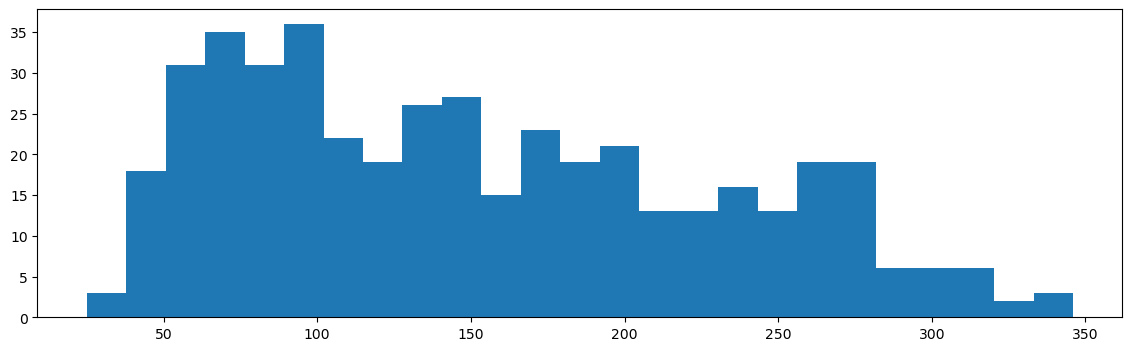

In [3]:
plt.figure(figsize=(14,4))
plt.hist(df["target"],25)
plt.show()

The distribution is not easily identifiable but seems to be skewed towards lower value.

Let's check the data for multicollinearity with a heat map of the correlation coefficients.

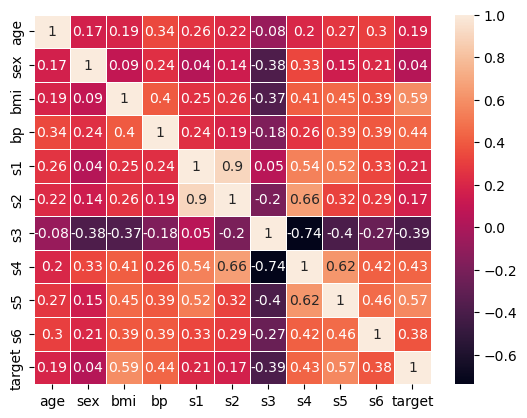

In [4]:
# plt.figure(figsize=(14,6))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.5)
plt.show()

The last row of the heatmap shows that the `target` variable has the highest correlation with `bmi` and `s5`.

We note that `s3` and `s4` are highly correlated as well as `s1` and `s2`

Let's scatter plots `bmi` and `s5` variables against `target`.

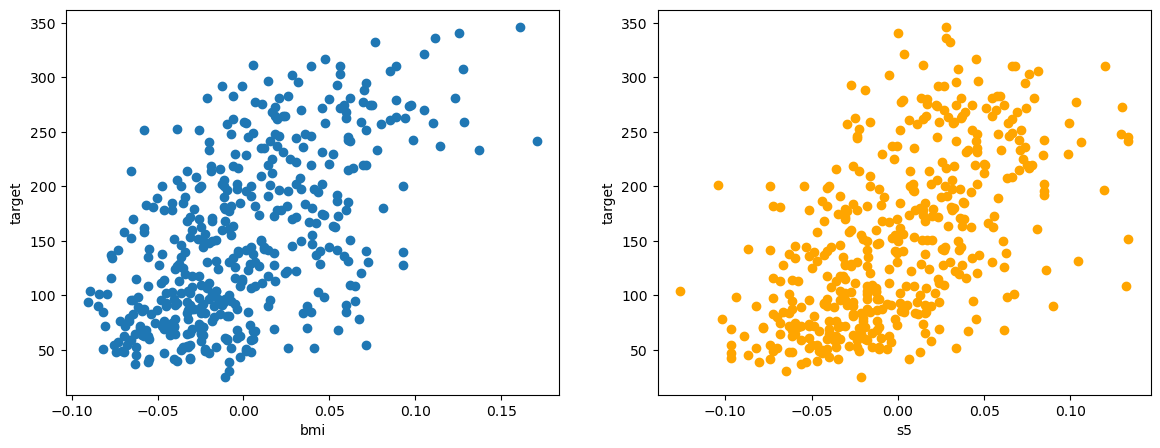

In [5]:
fig, axs = plt.subplots(1,2 , figsize = (14,5))

axs[0].scatter(df.bmi, df.target)
axs[0].set_xlabel("bmi")
axs[0].set_ylabel("target")

axs[1].scatter(df.s5, df.target , color='orange')
axs[1].set_xlabel("s5")
axs[1].set_ylabel("target")
plt.show()

Both variables seems to have a positive quite linear influence on the target variable.

Let's prepare training and testing data for multiple regression.

In [6]:
X = df[["bmi", "s5"]]
y = df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=5)

Let's train the model and evaluate the accuracy of the model

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)
print("RMSE on training data: {:.4f}".format(rmse))
print("R2 on training data:   {:.4f}".format(r2))

y_test_predict = lm.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
print("RMSE on test data:     {:.4f}".format(rmse_test))
print("R2 on test data:       {:.4f}".format(r2_test))

RMSE on training data: 56.5609
R2 on training data:   0.4508
RMSE on test data:     57.1760
R2 on test data:       0.4816


which indicates that our model does not work that well in this case. This is certainly due to the fact that `bmi` and `s5` are quite strongly correlated meaning that there is some amount of multicollinearity in the model.

## Multiple linear regression, example 2

Let's use a dataset of white wine quality for this example.

In [8]:
path = os.path.join(os.getcwd(), "data/winequality-white.csv")
df = pd.read_csv(path, delimiter = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Let's plot again a heatmap of the correlations (using absolute value to make it easier to read)

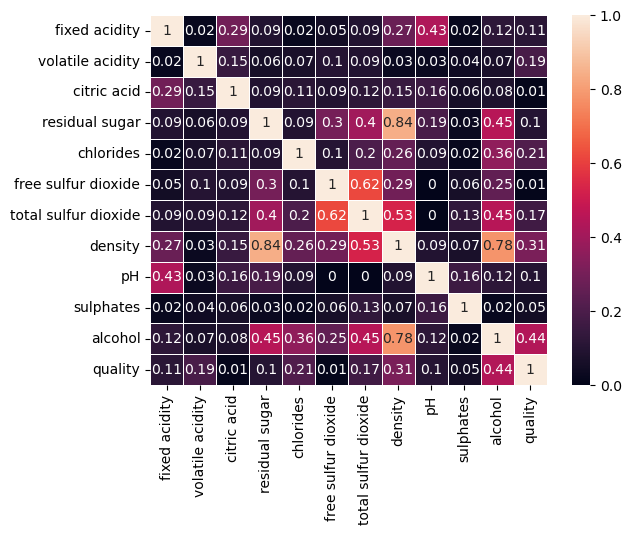

In [9]:
sns.heatmap(df.corr().round(2).abs(), annot=True, linewidths=0.5)
plt.show()

Lighter color correspond to higher absolute correlation, we can see that `residual sugar` and `alcohol` has the highest correlation for explaining `density`. Let's scatter plot them.

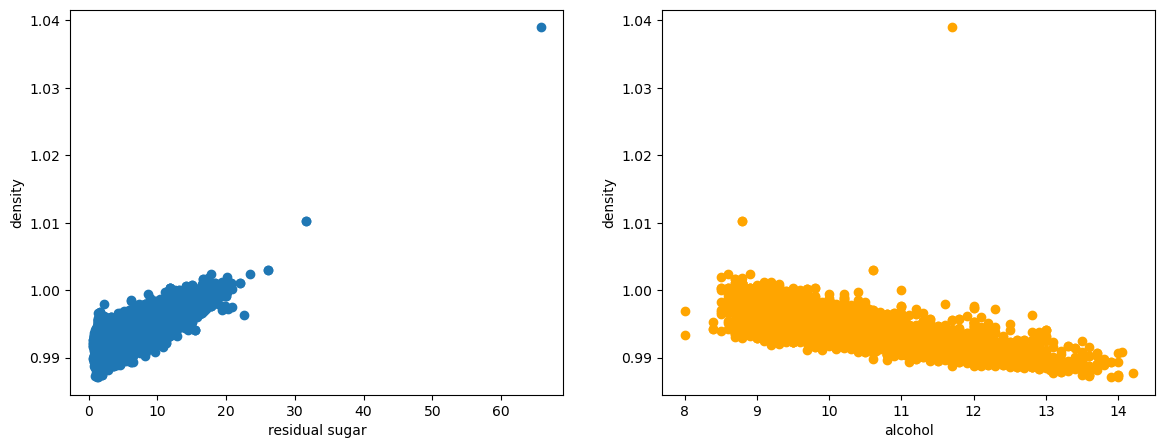

In [10]:
fig, axs = plt.subplots(1,2, figsize = (14,5))

axs[0].scatter(df["residual sugar"], df["density"])
axs[0].set_xlabel("residual sugar")
axs[0].set_ylabel("density")

axs[1].scatter(df["alcohol"], df["density"], color='orange')
axs[1].set_xlabel("alcohol")
axs[1].set_ylabel("density")
plt.show()

We form training and testing data using these variables, train the model and evaluate it.

In [11]:
X = df[["residual sugar", "alcohol"]]
y = df[["density"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

y_test_predict = lm.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("RMSE on training data: {:.4f}".format(rmse))
print("R2 on training data:   {:.4f}".format(r2))
print("RMSE on test data:     {:.4f}".format(rmse_test))
print("R2 on test data:       {:.4f}".format(r2_test))

RMSE on training data: 0.0009
R2 on training data:   0.9031
RMSE on test data:     0.0008
R2 on test data:       0.9210


## Bias-Variance dilemma

The bias-variance dilemma refers to the conflict between reducing bias and variance error in predictive models.

The principle in regression models is to minimize the total error with respect to training data. But low error does not guarantee good expected performance. This  phenomena is called overfitting. 

We can decompose error $E$ as follow
$$ E = Bias^2 + Variance + Noise $$
With noise any uncertainty out of our control.

- **Bias** represents the error due to overly simplistic assumptions in the learning algorithm. High bias cause the algorithm to miss relevant relationships between features and outputs (**underfitting**)

- **Variance** represents the error due to model's sensitivity to small fluctuations. High variance may result from an algorithm that models random noise in the training data. (**overfitting**)

- Key is to find a good balance between bias and variance.

![fitting](../Artificial%20Intelligence%20with%20Python/pics/fitting.png)

Models always contain certain amount of parameters (coefficients of polynomial regression for example) that also control the complexity of the model.

The more parameters the model has, the more complex it becomes.
- Simple models with few parameters tend to have **high bias** and **low variance**
- Complex models with more parameters tend to have **low bias** and **high variance**

The complexity of the model influences bias and variance in opposite manner. We cannot minimize both at the same time. This is the tradeoff one must be aware of when dealing with machine learning models.

![tradeoff](../Artificial%20Intelligence%20with%20Python/pics/tradeoff.png)

## Ridge regression

Ridge regression is designed to mitigate the bias-variance dilemma and to address the problem of multicollinearity in linear regression models. A regularization term $\alpha$ is added to constrains the coefficients predictors. It adds some amount of bias to reduce variance in order to improve the overall model performance. (In other word, to reduce overfitting)

In ridge regression we minimize
$$ \min_{b} \sum_i (y_i - a - \sum_j b_jx_{ij})^2 + \alpha \sum_j b_j^2 $$

When the parameter $\alpha = 0$, we have our usual multiple regression.

Let's plot some ridge regression with a single coefficient with different alpha values.

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import os

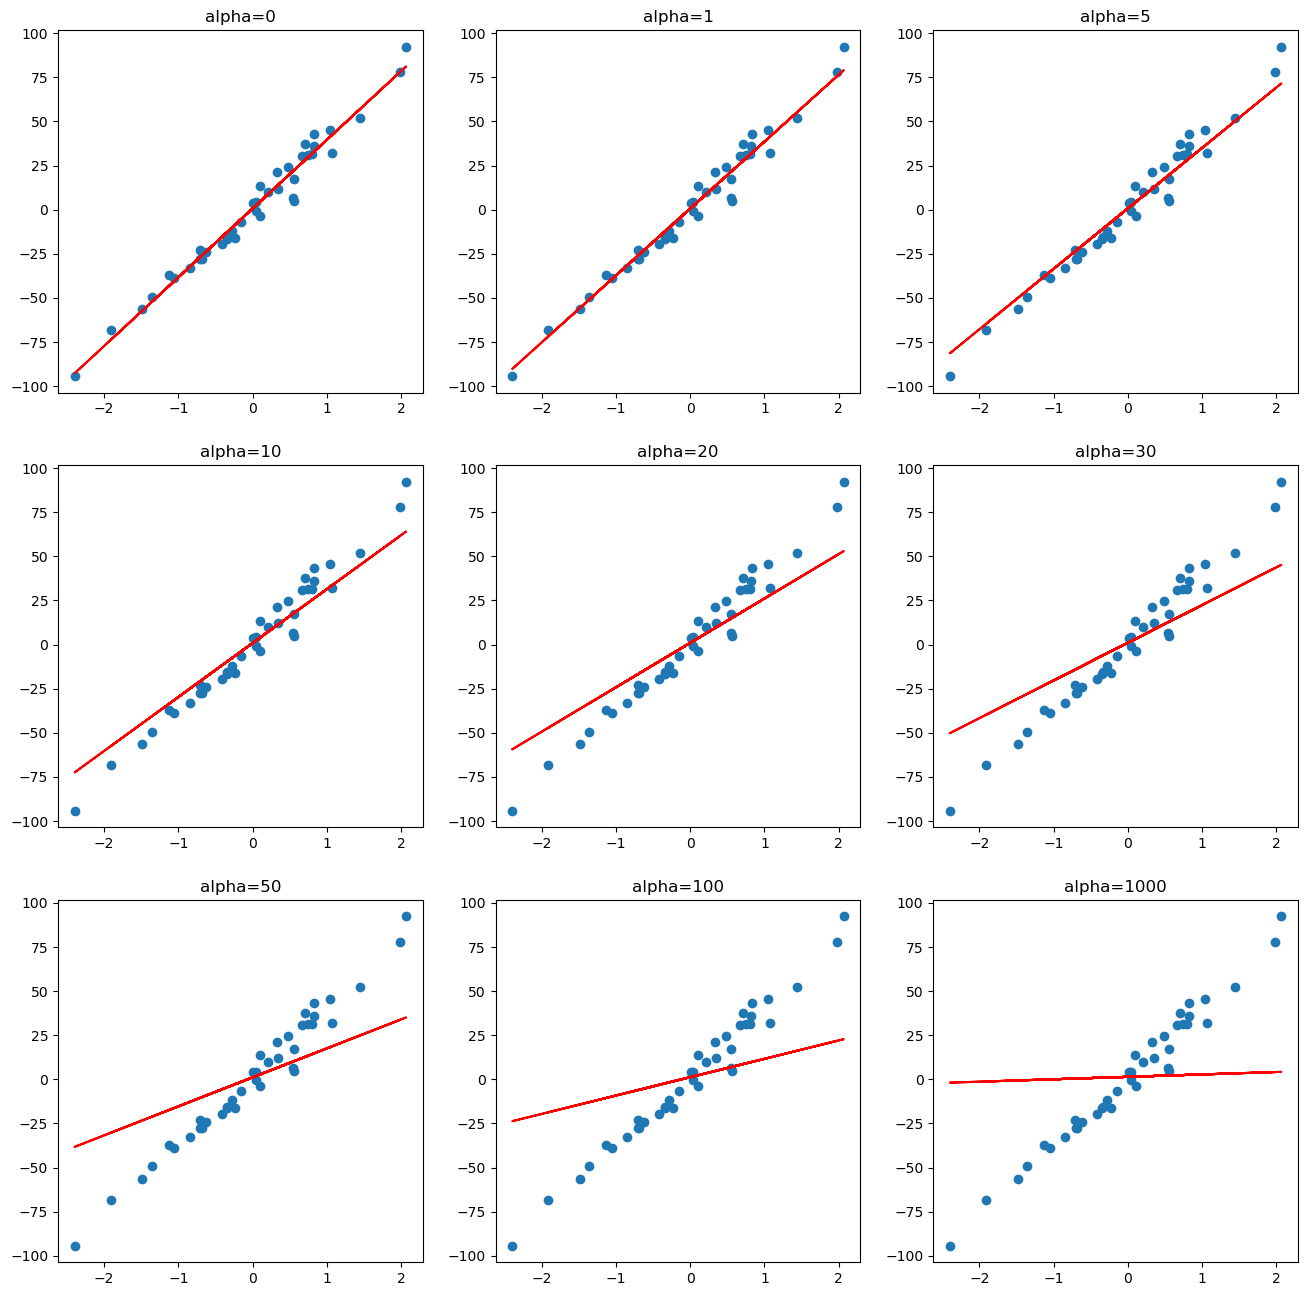

In [13]:
path = os.path.join(os.getcwd(), "data/ridgereg_data.csv")
df = pd.read_csv(path)
df.head()

x = np.array(df.x).reshape(-1,1)
y = np.array(df.y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

fig, axs = plt.subplots(3,3, figsize=(16,16))
i=0;j=0
for alp in [0,1,5,10,20,30,50,100,1000]:
    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train)
    axs[i,j].scatter(X_train,y_train)
    axs[i,j].plot(X_train,rr.predict(X_train),color="red")
    axs[i,j].set_title("alpha="+str(alp))
    
    j += 1
    if j%3 == 0: j = 0; i += 1
plt.show()

Let's find the optimal $\alpha$ value that maximize the $R^2$ score.

R2 max: 0.9478197468856872,  Alpha: 0.8163265306122448


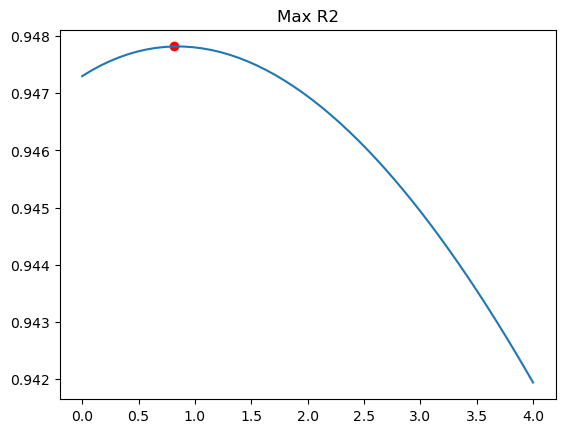

In [14]:
alphas = np.linspace(0,4,50) # past 4 the score decreases
r2values = []
max=0;a_max=0
for alp in alphas:
    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train)
    r2_test = r2_score(y_test, rr.predict(X_test))
    r2values.append(r2_test)
    if r2_test > max: max= r2_test; a_max=alp
    
print("R2 max: {},  Alpha: {}".format(max,a_max))
plt.scatter(a_max, max, c = 'r')
plt.plot(alphas,r2values)
plt.title("Max R2")

plt.show()

## Lasso regression

LASSO stands for "Least Absolute Shrinkage and Selection Operator". It is similar to ridge regression in some regard but also bears some difference.

In LASSO regression we minimize

$$ \min_{b} \sum_i (y_i - a - \sum_j b_jx_{ij})^2 + \alpha \sum_j \left| b_j \right| $$

It adds penalty equal to the absolute value of the magnitude of coefficients instead of squared values.

This difference has a major consequence when working with multiple variables, it can exclude useless variables while reducing variance and simplifying model interpretation.

LASSO regression is available in sklearn as the function `Lasso()`. Let's try with some diamond prices.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
path = os.path.join(os.getcwd(), "data/diamonds.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
coeff_name = ["carat", "depth", "table", "x", "y", "z"]

X = df[coeff_name]
y = df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]
scores = []
res = pd.DataFrame(columns=coeff_name)

for alp in alphas:
    lasso = linear_model.Lasso(alpha=alp)
    lasso.fit(X_train, y_train)
    res.loc[len(res)] = lasso.coef_
    sc = lasso.score(X_test, y_test)
    scores.append(sc)
    print("Alpha: {:2.2f},   Lasso score: {:.4f}".format(alp, sc))

Alpha: 0.10,   Lasso score: 0.8615
Alpha: 0.20,   Lasso score: 0.8616
Alpha: 0.30,   Lasso score: 0.8616
Alpha: 0.40,   Lasso score: 0.8617
Alpha: 0.50,   Lasso score: 0.8617
Alpha: 1.00,   Lasso score: 0.8619
Alpha: 2.00,   Lasso score: 0.8621
Alpha: 3.00,   Lasso score: 0.8622
Alpha: 4.00,   Lasso score: 0.8620
Alpha: 5.00,   Lasso score: 0.8618
Alpha: 6.00,   Lasso score: 0.8616
Alpha: 7.00,   Lasso score: 0.8614
Alpha: 8.00,   Lasso score: 0.8612


Let's plot the scores

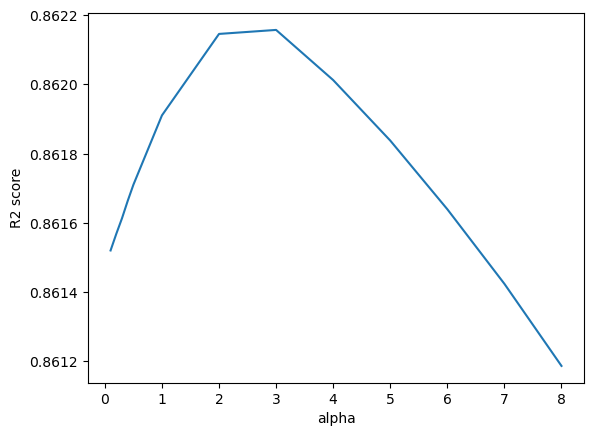

In [18]:
plt.plot(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()

We can see that we reach the maximum $R^2$ score with and alpha of around 3.

Let's have a look at the coefficient

In [19]:
a = pd.Series(alphas, name="alpha")
res.index = a
res

,carat,depth,table,x,y,z
alpha,,,,,,
0.1,10561.285928,-198.532376,-100.891094,-1481.663873,272.522619,58.673072
0.2,10548.863987,-196.142601,-100.909536,-1449.324892,267.662569,22.317186
0.3,10535.480356,-194.563172,-100.919124,-1423.176172,260.747481,0.000000
0.4,10522.451919,-194.297994,-100.909145,-1408.702298,251.643416,0.000000
0.5,10509.756546,-194.037886,-100.898115,-1394.574193,242.745582,0.000000
1.0,10444.780997,-192.710159,-100.843398,-1323.387669,198.328858,-0.000000
2.0,10313.859167,-190.036812,-100.733962,-1180.726549,109.607312,-0.000000
3.0,10181.416506,-187.308142,-100.597704,-1043.921293,27.309338,-0.000000
4.0,10043.782180,-184.252662,-100.233263,-959.401425,0.000000,-0.000000


The LASSO regressor returns zero values for two variables. It is interpreted as these variables are useless in the model.